In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from sklearn.metrics import classification_report

In [4]:
def load_data(path,batch_size,res=32):
  return tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(res,res),
    shuffle=True)
val_images = load_data("val_images_cropped/",batch_size=128)

Found 46276 files belonging to 1 classes.


### Report

In [5]:
model_entrenado = tf.keras.models.load_model('Modelos/Categorias 3H sin corte.h5')

In [8]:
label_list = ['Anorak', 'Blazer', 'Blouse', 'Bomber', 'Button-Down', 'Caftan', 'Capris', 'Cardigan', 'Chinos', 'Coat', 'Coverup', 'Culottes', 'Cutoffs', 'Dress', 'Flannel', 'Gauchos', 'Halter', 'Henley', 'Hoodie', 'Jacket', 'Jeans', 'Jeggins', 'Jersey', 'Joggers', 'Jumpsuit', 'Kaftan', 'Kimono', 'Leggings', 'Onesie', 'Parka', 'Peacoat', 'Poncho', 'Robe', 'Romper', 'Sarong', 'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee', 'Top', 'Trunks', 'Turtleneck']

In [10]:
def get_report(model,dataset):
  y_pred = []
  y_true = []
  for image_batch, label_batch in dataset:
    y_true.append(tf.argmax(label_batch,axis=-1))
    preds = model.predict(image_batch,verbose=0)
    y_pred.append(np.argmax(preds,axis=-1))
  correct_labels = tf.concat([item for item in y_true], axis=0)
  predicted_labels = tf.concat([item for item in y_pred], axis=0)
  cf = classification_report(correct_labels, predicted_labels, target_names=label_list)
  return cf
print(get_report(model_entrenado,val_images))

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: val_images_cropped/val_images_cropped\Top\train_item194928.jpg : The system cannot find the path specified.
; No such process
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

In [2]:
# Metadata
train_metadata = pd.read_csv('metadata_train_df.csv')
reduced_train_metadata = pd.read_csv('metadata_reduced_train_df.csv')
val_metadata = pd.read_csv('metadata_val_df.csv')
test_metadata = pd.read_csv('metadata_test_df.csv')

# Ejemplos
ejemplo = pd.read_csv('ejemplo_submission_file.csv')
solution = pd.read_csv('sample_solution_key_KAGGLE.csv')

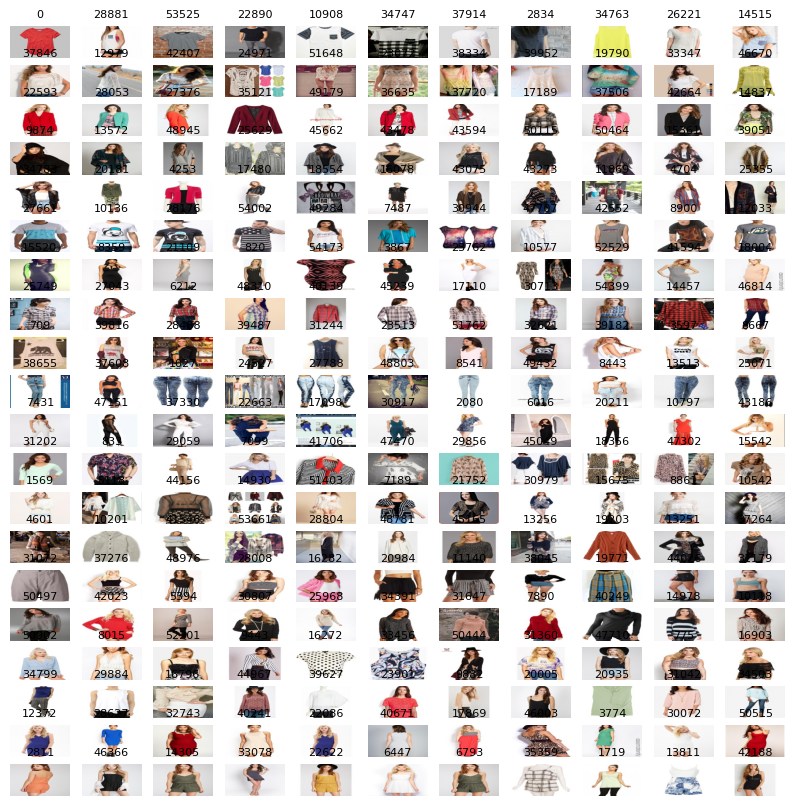

In [105]:
id_col = solution['Id']
exp_col = solution['Expected']

size = 10
counter = 0
rows = 20
cols = 11
showme = rows*cols
cont_exp = 0

fig = plt.figure('Solution', figsize=[size,size])
for i in id_col.values:
    ax = fig.add_subplot(rows, cols, counter+1)

    image = plt.imread('test_images/test_item' + str(i) + '.jpg', format=None)/255.0
    plt.imshow(image,aspect='auto')
    plt.axis('off')
    plt.title(i,fontsize=8)
    counter += 1

    lista_exp = exp_col[cont_exp].split()
    for k in lista_exp:
        ax = fig.add_subplot(rows, cols, counter+1)
        image = plt.imread('test_images/test_item' + str(k) + '.jpg', format=None)/255.0
        plt.imshow(image,aspect='auto')
        plt.axis('off')
        plt.title(k,fontsize=8)
        counter += 1

    cont_exp += 1
    if counter>=showme:
        break
    
plt.show()

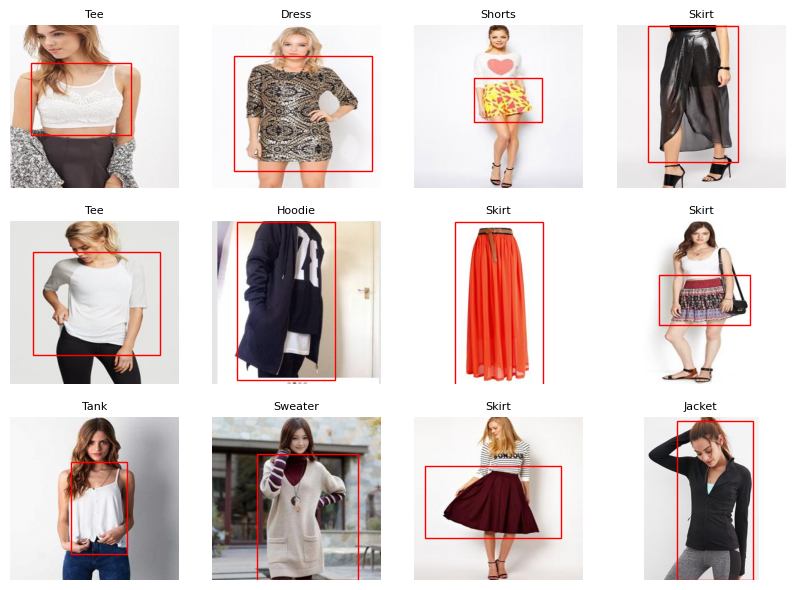

In [5]:
showme = 10
size = 10
counter = 0
fig = plt.figure('Ejemplos', figsize=[size,size*10/4]) 
for index, row in train_metadata.iterrows():
  class_name = row['category']
  path_image = row['public_path']
  x1 = row['x_1']; y1 = row['y_1']
  x2 = row['x_2']; y2 = row['y_2'] 
  w = x2-x1; h = y2-y1
  image = plt.imread(path_image, format=None)/255.0
  ax = fig.add_subplot(10, 4, counter+1) 
  plt.imshow(image,aspect='auto')
  ax.add_patch(patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none'))
  plt.grid(None) 
  plt.axis('off')
  plt.title(class_name,fontsize=8) 
  if counter>showme:
    break
  counter+=1
plt.show()